In [1]:
import xml.etree.ElementTree as et
import csv
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_aqi_cpcb.xml to data_aqi_cpcb.xml


#Web Scraping

In [5]:
tree = et.parse("data_aqi_cpcb.xml")

In [6]:
root = tree.getroot()

In [7]:
arr = []

In [9]:
pm2_array = []
pm10_array = []
no2_array =[]
nh3_array = []
so2_array = []
co_array = []
o3_array = []
aqi_val_array = []
predominant_para_array = []
date_array = []
time_array = []
state_array = []
city_array = []
station_array = []


In [10]:

for country in root.findall("Country"):
    for state in country.findall("State"):
        for city in state.findall("City"):
            for station in city.findall("Station"):
                state_array.append(state.get('id'))
                city_array.append(city.get('id'))
                station_array.append(station.get('id'))
                dt = station.get("lastupdate")
                dt = dt.split()
                date_array.append(dt[0])
                time_array.append(dt[1])
                pol_arr = ["PM2.5","PM10","NO2","NH3","SO2","CO","OZONE"]
                aqi_present = "yes"
                for pindex in station.findall("Pollutant_Index"):
                    #print(pindex.get('Avg'))
                    if(pindex.get('id') == "PM2.5"):
                        pm2_array.append(pindex.get('Avg'))
                        pol_arr.remove('PM2.5')
                    elif(pindex.get('id') == "PM10"):
                        pm10_array.append(pindex.get('Avg'))
                        pol_arr.remove('PM10')
                    elif(pindex.get('id') == 'NO2'):
                        no2_array.append(pindex.get('Avg'))
                        pol_arr.remove("NO2")
                    elif(pindex.get('id') == "NH3"):
                        nh3_array.append(pindex.get('Avg'))
                        pol_arr.remove("NH3")
                    elif(pindex.get('id') == "SO2"):
                        so2_array.append(pindex.get('Avg'))
                        pol_arr.remove("SO2")
                    elif(pindex.get('id') == "CO"):
                        co_array.append(pindex.get('Avg'))
                        pol_arr.remove("CO")
                    elif(pindex.get('id') == "OZONE"):
                        o3_array.append(pindex.get('Avg'))
                        pol_arr.remove("OZONE")

                if(len(pol_arr)!=0):
                    while(len(pol_arr) != 0):
                        ele = pol_arr.pop(0)
                        if(ele == "PM2.5"):
                            pm2_array.append('NA')
                        elif(ele == "PM10"):
                            pm10_array.append('NA')
                        elif(ele == "NO2"):
                            no2_array.append('NA')
                        elif(ele == "NH3"):
                            nh3_array.append('NA')
                        elif(ele == "SO2"):
                            so2_array.append('NA')
                        elif(ele == "CO"):
                            co_array.append('NA')
                        elif(ele == "OZONE"):
                            o3_array.append('NA')
                if(station.find('Air_Quality_Index') is not None):
                    aqi_val_array.append(station.find('Air_Quality_Index').get('Value'))
                    predominant_para_array.append(station.find('Air_Quality_Index').get('Predominant_Parameter'))
                else:
                    aqi_val_array.append('NA')
                    predominant_para_array.append('NA')

In [11]:

data_row = []
for a,b,c,d,e,i,j,k,l,m,n,p,q,r in zip(state_array,city_array,station_array,date_array,time_array,pm2_array,pm10_array,no2_array,nh3_array,so2_array,co_array,o3_array,aqi_val_array,predominant_para_array):
    data_row.append([a,b,c,d,e,i,j,k,l,m,n,p,q,r])

In [12]:
data_row.insert(0,["state","city","station","date","time","PM2.5","PM10","NO2","NH3","SO2","CO","OZONE","AQI","Predominant_Parameter"])

In [13]:
 for i in data_row: #raw data array
     print(i)
 print("********")


['state', 'city', 'station', 'date', 'time', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI', 'Predominant_Parameter']
['Andhra_Pradesh', 'Amaravati', 'Secretariat, Amaravati - APPCB', '19-07-2023', '19:00:00', '12', '10', '5', '5', '12', '16', '21', '21', 'OZONE']
['Andhra_Pradesh', 'Anantapur', 'Gulzarpet, Anantapur - APPCB', '19-07-2023', '19:00:00', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']
['Andhra_Pradesh', 'Chittoor', 'Gangineni Cheruvu, Chittoor - APPCB', '19-07-2023', '19:00:00', '29', '30', '10', '1', '6', '18', '43', '43', 'OZONE']
['Andhra_Pradesh', 'Rajamahendravaram', 'Anand Kala Kshetram, Rajamahendravaram - APPCB', '19-07-2023', '19:00:00', '5', '9', '14', '2', '8', '18', '8', '18', 'CO']
['Andhra_Pradesh', 'Tirupati', 'Tirumala, Tirupati - APPCB', '19-07-2023', '19:00:00', '21', '44', '28', '2', '8', '15', '34', '44', 'PM10']
['Andhra_Pradesh', 'Tirupati', 'Vaikuntapuram, Tirupati - APPCB', '19-07-2023', '19:00:00', 'NA', 'NA', 'NA', 'NA', 'NA', 

In [14]:
import pandas as pd
df = pd.DataFrame(data_row)

In [15]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('RAW_DATASET_state_weather_aqi_data.csv')

Saving RAW_DATASET_state_weather_aqi_data.csv to RAW_DATASET_state_weather_aqi_data.csv


In [16]:
# df.rename(rows={"0":"state","1":"city","2":"station","3":"date","4":"time","5":"PM2.5","6":"PM10","7":"NO2","8":"NH3","9":"SO2","10":"CO","11":"OZONE","12":"AQI","13":"Predominant_Parameter"}, inplace=True)

In [17]:
df

state               city  \
0     Andhra_Pradesh          Amaravati   
1     Andhra_Pradesh  Rajamahendravaram   
2     Andhra_Pradesh           Tirupati   
3     Andhra_Pradesh      Visakhapatnam   
4     Andhra_Pradesh          Amaravati   
...              ...                ...   
1568     West_Bengal            Kolkata   
1569     West_Bengal            Kolkata   
1570     West_Bengal            Kolkata   
1571     West_Bengal            Kolkata   
1572     West_Bengal           Siliguri   

                                             station        date      time  \
0                     Secretariat, Amaravati - APPCB  03-01-2020  10:00:00   
1     Anand Kala Kshetram, Rajamahendravaram - APPCB  03-01-2020  10:00:00   
2                         Tirumala, Tirupati - APPCB  03-01-2020  10:00:00   
3             GVM Corporation, Visakhapatnam - APPCB  03-01-2020  10:00:00   
4                     Secretariat, Amaravati - APPCB  05-01-2020  06:00:00   
...                                              ...         ...       ...   
1568                       Jadavpur, Kolkata - WBPCB  07-01-2020  03:00:00   
1569    Rabindra Bharati University, Kolkata - WBPCB  07-01-2020  03:00:00   
1570               Rabindra Sarobar, Kolkata - WBPCB  07-01-2020  03:00:00   
1571                       Victoria, Kolkata - WBPCB  07-01-2020  03:00:00   
1572              Ward-32 Bapupara, Siliguri - WBPCB  07-01-2020  03:00:00   

      PM2.5   PM10   NO2   NH3   SO2    CO  OZONE    AQI Predominant_Parameter  
0      68.0   64.0  17.0   4.0  28.0  31.0   40.0   68.0                 PM2.5  
1      67.0   70.0  23.0   2.0  13.0  49.0   77.0   77.0                 OZONE  
2      32.0    NaN  26.0   5.0   6.0  19.0   16.0   32.0                 PM2.5  
3      93.0   93.0  31.0   3.0   9.0  57.0   61.0   93.0                  PM10  
4      60.0   55.0  20.0   5.0  18.0  29.0   53.0   60.0                 PM2.5  
...     ...    ...   ...   ...   ...   ...    ...    ...                   ...  
1568  163.0  142.0  57.0   7.0  10.0  39.0    8.0  163.0                 PM2.5  
1569  279.0  215.0  78.0  11.0  23.0  31.0   53.0  279.0                 PM2.5  
1570  162.0  136.0  43.0   4.0  16.0  34.0   44.0  162.0                 PM2.5  
1571  213.0  152.0  55.0   5.0  11.0  95.0   64.0  213.0                 PM2.5  
1572  199.0  166.0  60.0   7.0   6.0  29.0   36.0  199.0                 PM2.5  

[1573 rows x 14 columns]

In [20]:
df.head()

state               city  \
0  Andhra_Pradesh          Amaravati   
1  Andhra_Pradesh  Rajamahendravaram   
2  Andhra_Pradesh           Tirupati   
3  Andhra_Pradesh      Visakhapatnam   
4  Andhra_Pradesh          Amaravati   

                                          station        date      time  \
0                  Secretariat, Amaravati - APPCB  03-01-2020  10:00:00   
1  Anand Kala Kshetram, Rajamahendravaram - APPCB  03-01-2020  10:00:00   
2                      Tirumala, Tirupati - APPCB  03-01-2020  10:00:00   
3          GVM Corporation, Visakhapatnam - APPCB  03-01-2020  10:00:00   
4                  Secretariat, Amaravati - APPCB  05-01-2020  06:00:00   

   PM2.5  PM10   NO2  NH3   SO2    CO  OZONE   AQI Predominant_Parameter  
0   68.0  64.0  17.0  4.0  28.0  31.0   40.0  68.0                 PM2.5  
1   67.0  70.0  23.0  2.0  13.0  49.0   77.0  77.0                 OZONE  
2   32.0   NaN  26.0  5.0   6.0  19.0   16.0  32.0                 PM2.5  
3   93.0  93.0  31.0  3.0   9.0  57.0   61.0  93.0                  PM10  
4   60.0  55.0  20.0  5.0  18.0  29.0   53.0  60.0                 PM2.5

In [21]:
df.tail()

state      city                                       station  \
1568  West_Bengal   Kolkata                     Jadavpur, Kolkata - WBPCB   
1569  West_Bengal   Kolkata  Rabindra Bharati University, Kolkata - WBPCB   
1570  West_Bengal   Kolkata             Rabindra Sarobar, Kolkata - WBPCB   
1571  West_Bengal   Kolkata                     Victoria, Kolkata - WBPCB   
1572  West_Bengal  Siliguri            Ward-32 Bapupara, Siliguri - WBPCB   

            date      time  PM2.5   PM10   NO2   NH3   SO2    CO  OZONE  \
1568  07-01-2020  03:00:00  163.0  142.0  57.0   7.0  10.0  39.0    8.0   
1569  07-01-2020  03:00:00  279.0  215.0  78.0  11.0  23.0  31.0   53.0   
1570  07-01-2020  03:00:00  162.0  136.0  43.0   4.0  16.0  34.0   44.0   
1571  07-01-2020  03:00:00  213.0  152.0  55.0   5.0  11.0  95.0   64.0   
1572  07-01-2020  03:00:00  199.0  166.0  60.0   7.0   6.0  29.0   36.0   

        AQI Predominant_Parameter  
1568  163.0                 PM2.5  
1569  279.0                 PM2.5  
1570  162.0                 PM2.5  
1571  213.0                 PM2.5  
1572  199.0                 PM2.5

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1573 non-null   object 
 1   city                   1573 non-null   object 
 2   station                1573 non-null   object 
 3   date                   1573 non-null   object 
 4   time                   1573 non-null   object 
 5   PM2.5                  1392 non-null   float64
 6   PM10                   1228 non-null   float64
 7   NO2                    1415 non-null   float64
 8   NH3                    1122 non-null   float64
 9   SO2                    1357 non-null   float64
 10  CO                     1508 non-null   float64
 11  OZONE                  1422 non-null   float64
 12  AQI                    1568 non-null   float64
 13  Predominant_Parameter  1428 non-null   object 
dtypes: float64(8), object(6)
memory usage: 172.2+ KB


In [23]:
df.describe()

PM2.5         PM10          NO2          NH3          SO2  \
count  1392.000000  1228.000000  1415.000000  1122.000000  1357.000000   
mean    182.898707   141.674267    46.588693     8.402852    16.427413   
std     106.272193    66.727131    31.741560     5.591818    12.566816   
min       9.000000    21.000000     1.000000     1.000000     1.000000   
25%      88.000000    93.000000    23.000000     4.000000     8.000000   
50%     164.500000   130.000000    42.000000     7.000000    13.000000   
75%     278.250000   184.250000    64.000000    12.000000    20.000000   
max     441.000000   394.000000   247.000000    34.000000    92.000000   

                CO        OZONE          AQI  
count  1508.000000  1422.000000  1568.000000  
mean     51.295093    29.813643   188.255102  
std      28.063603    22.739562    98.914736  
min       1.000000     1.000000    25.000000  
25%      30.000000    13.000000   101.000000  
50%      46.000000    25.000000   174.500000  
75%      67.000000    40.000000   278.000000  
max     200.000000   206.000000   441.000000

#Exploratory Data Analysis(EDA)

##Data Cleaning Missing Values

<Axes: >

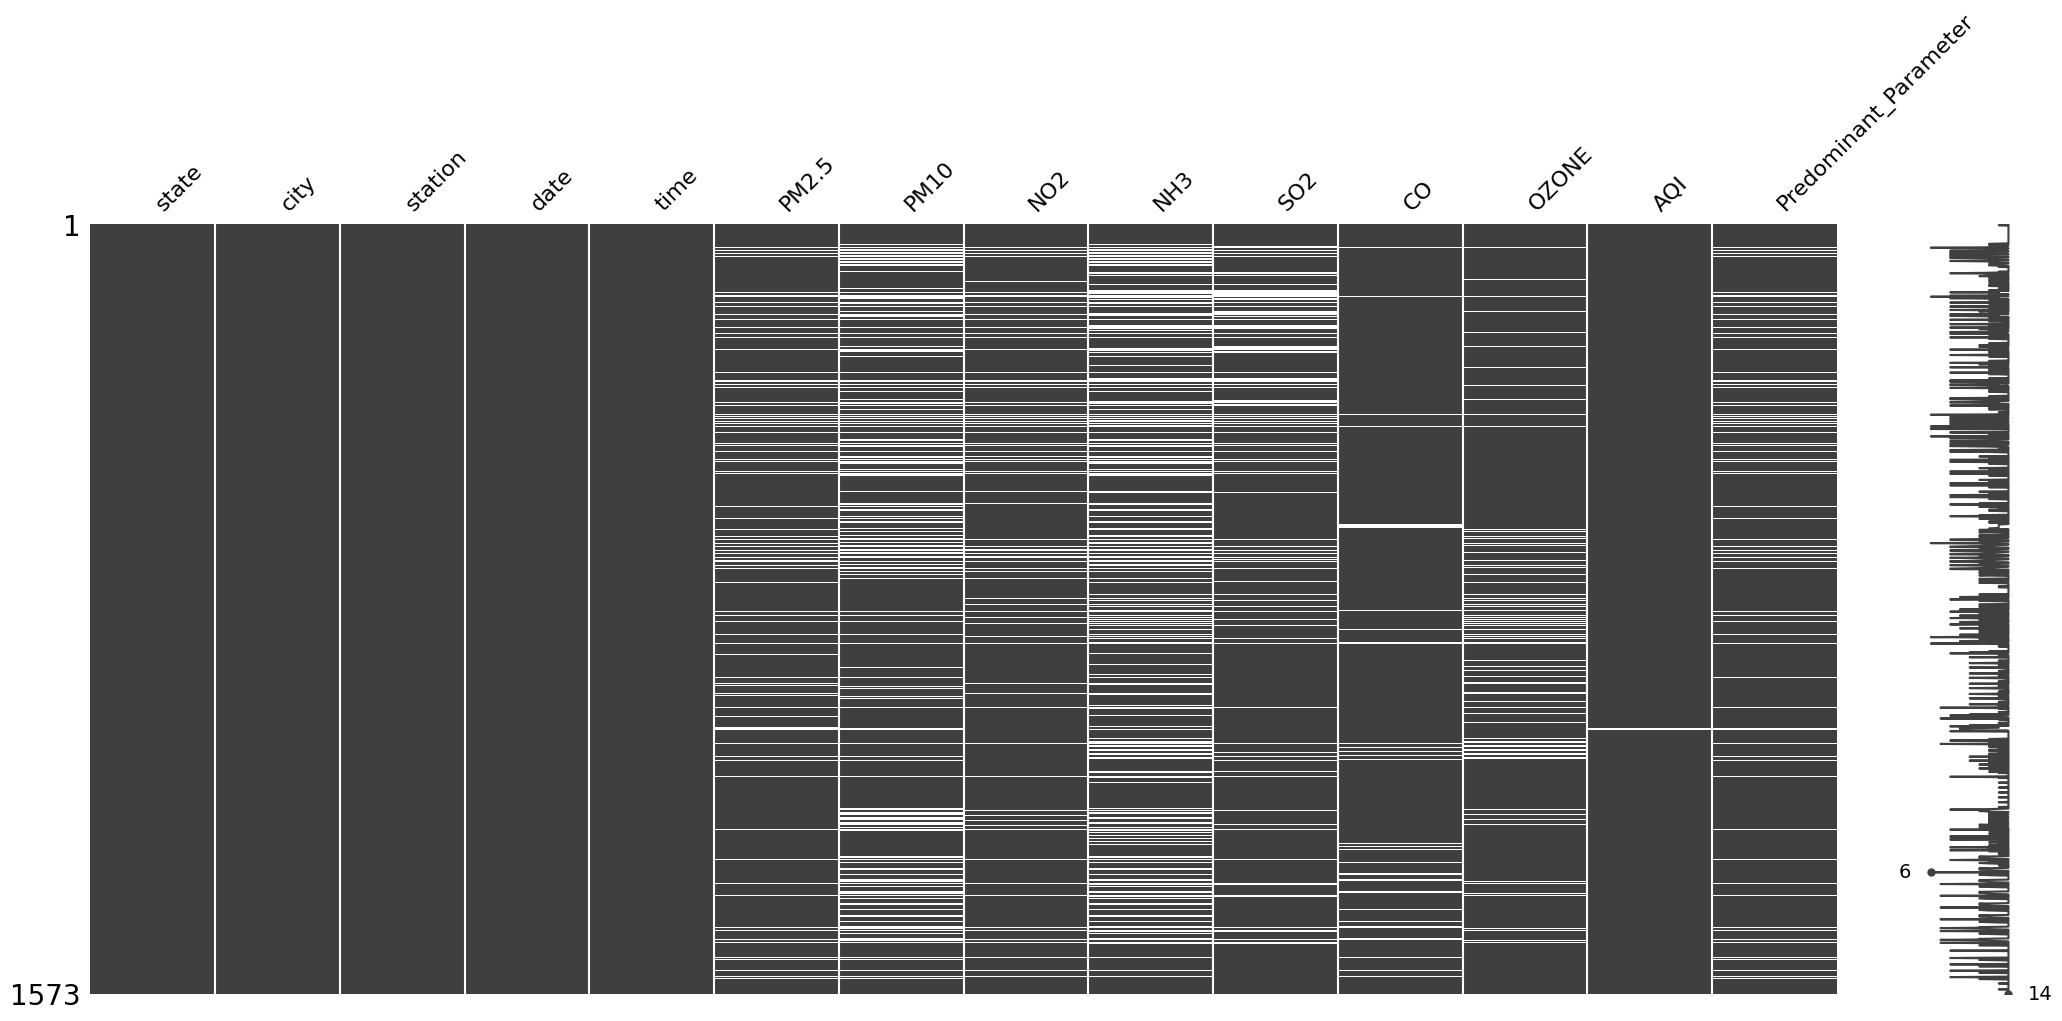

In [24]:
import missingno as msn
msn.matrix(df)

In [25]:
df.isnull().sum() #as no missing--> not needed to drop-->no input is also needed

state                      0
city                       0
station                    0
date                       0
time                       0
PM2.5                    181
PM10                     345
NO2                      158
NH3                      451
SO2                      216
CO                        65
OZONE                    151
AQI                        5
Predominant_Parameter    145
dtype: int64

In [26]:
df_cleaned = df.dropna()

In [27]:
df_cleaned

state               city  \
0     Andhra_Pradesh          Amaravati   
1     Andhra_Pradesh  Rajamahendravaram   
3     Andhra_Pradesh      Visakhapatnam   
4     Andhra_Pradesh          Amaravati   
5     Andhra_Pradesh  Rajamahendravaram   
...              ...                ...   
1568     West_Bengal            Kolkata   
1569     West_Bengal            Kolkata   
1570     West_Bengal            Kolkata   
1571     West_Bengal            Kolkata   
1572     West_Bengal           Siliguri   

                                             station        date      time  \
0                     Secretariat, Amaravati - APPCB  03-01-2020  10:00:00   
1     Anand Kala Kshetram, Rajamahendravaram - APPCB  03-01-2020  10:00:00   
3             GVM Corporation, Visakhapatnam - APPCB  03-01-2020  10:00:00   
4                     Secretariat, Amaravati - APPCB  05-01-2020  06:00:00   
5     Anand Kala Kshetram, Rajamahendravaram - APPCB  05-01-2020  06:00:00   
...                                              ...         ...       ...   
1568                       Jadavpur, Kolkata - WBPCB  07-01-2020  03:00:00   
1569    Rabindra Bharati University, Kolkata - WBPCB  07-01-2020  03:00:00   
1570               Rabindra Sarobar, Kolkata - WBPCB  07-01-2020  03:00:00   
1571                       Victoria, Kolkata - WBPCB  07-01-2020  03:00:00   
1572              Ward-32 Bapupara, Siliguri - WBPCB  07-01-2020  03:00:00   

      PM2.5   PM10   NO2   NH3   SO2    CO  OZONE    AQI Predominant_Parameter  
0      68.0   64.0  17.0   4.0  28.0  31.0   40.0   68.0                 PM2.5  
1      67.0   70.0  23.0   2.0  13.0  49.0   77.0   77.0                 OZONE  
3      93.0   93.0  31.0   3.0   9.0  57.0   61.0   93.0                  PM10  
4      60.0   55.0  20.0   5.0  18.0  29.0   53.0   60.0                 PM2.5  
5      48.0   52.0  25.0   3.0  12.0  43.0   67.0   67.0                 OZONE  
...     ...    ...   ...   ...   ...   ...    ...    ...                   ...  
1568  163.0  142.0  57.0   7.0  10.0  39.0    8.0  163.0                 PM2.5  
1569  279.0  215.0  78.0  11.0  23.0  31.0   53.0  279.0                 PM2.5  
1570  162.0  136.0  43.0   4.0  16.0  34.0   44.0  162.0                 PM2.5  
1571  213.0  152.0  55.0   5.0  11.0  95.0   64.0  213.0                 PM2.5  
1572  199.0  166.0  60.0   7.0   6.0  29.0   36.0  199.0                 PM2.5  

[967 rows x 14 columns]

<Axes: >

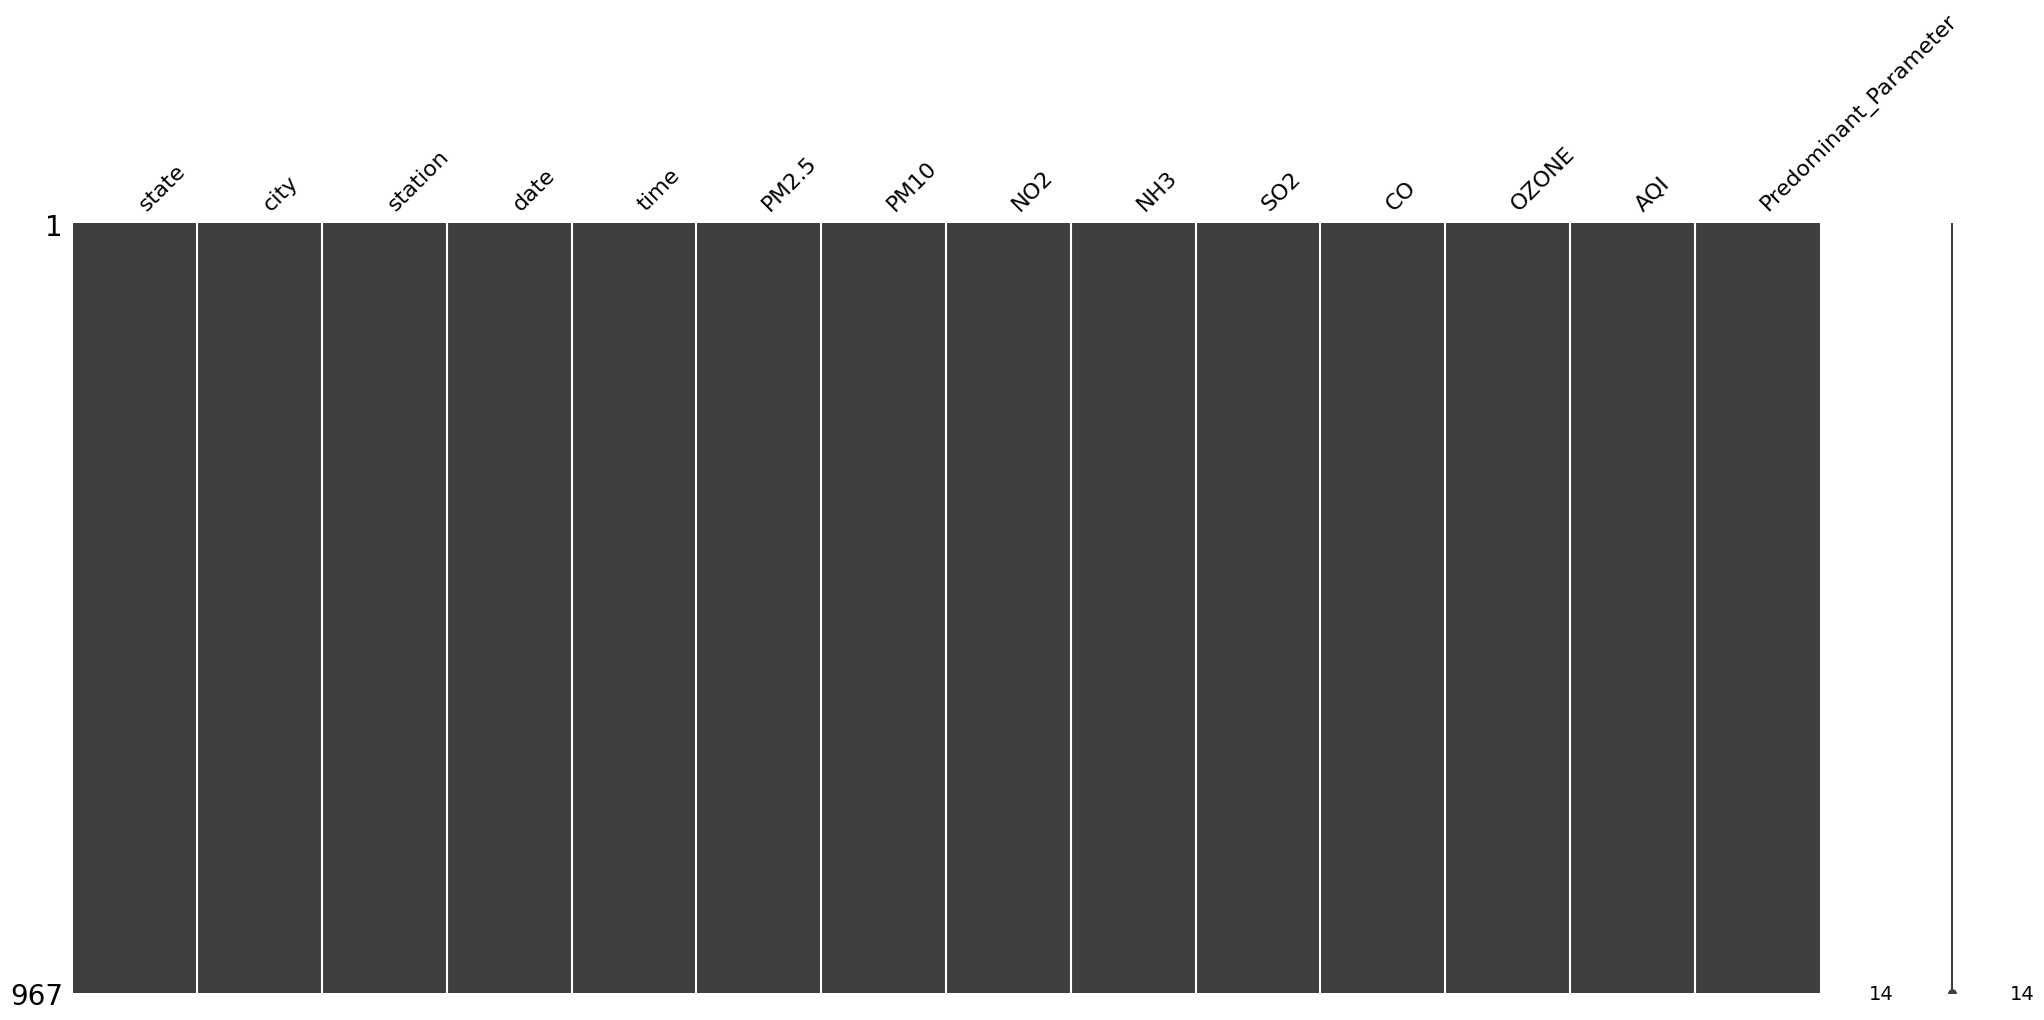

In [28]:
import missingno as msn
msn.matrix(df_cleaned)

In [29]:
df_cleaned.head()

state               city  \
0  Andhra_Pradesh          Amaravati   
1  Andhra_Pradesh  Rajamahendravaram   
3  Andhra_Pradesh      Visakhapatnam   
4  Andhra_Pradesh          Amaravati   
5  Andhra_Pradesh  Rajamahendravaram   

                                          station        date      time  \
0                  Secretariat, Amaravati - APPCB  03-01-2020  10:00:00   
1  Anand Kala Kshetram, Rajamahendravaram - APPCB  03-01-2020  10:00:00   
3          GVM Corporation, Visakhapatnam - APPCB  03-01-2020  10:00:00   
4                  Secretariat, Amaravati - APPCB  05-01-2020  06:00:00   
5  Anand Kala Kshetram, Rajamahendravaram - APPCB  05-01-2020  06:00:00   

   PM2.5  PM10   NO2  NH3   SO2    CO  OZONE   AQI Predominant_Parameter  
0   68.0  64.0  17.0  4.0  28.0  31.0   40.0  68.0                 PM2.5  
1   67.0  70.0  23.0  2.0  13.0  49.0   77.0  77.0                 OZONE  
3   93.0  93.0  31.0  3.0   9.0  57.0   61.0  93.0                  PM10  
4   60.0  55.0  20.0  5.0  18.0  29.0   53.0  60.0                 PM2.5  
5   48.0  52.0  25.0  3.0  12.0  43.0   67.0  67.0                 OZONE

In [30]:
df.describe()

PM2.5         PM10          NO2          NH3          SO2  \
count  1392.000000  1228.000000  1415.000000  1122.000000  1357.000000   
mean    182.898707   141.674267    46.588693     8.402852    16.427413   
std     106.272193    66.727131    31.741560     5.591818    12.566816   
min       9.000000    21.000000     1.000000     1.000000     1.000000   
25%      88.000000    93.000000    23.000000     4.000000     8.000000   
50%     164.500000   130.000000    42.000000     7.000000    13.000000   
75%     278.250000   184.250000    64.000000    12.000000    20.000000   
max     441.000000   394.000000   247.000000    34.000000    92.000000   

                CO        OZONE          AQI  
count  1508.000000  1422.000000  1568.000000  
mean     51.295093    29.813643   188.255102  
std      28.063603    22.739562    98.914736  
min       1.000000     1.000000    25.000000  
25%      30.000000    13.000000   101.000000  
50%      46.000000    25.000000   174.500000  
75%      67.000000    40.000000   278.000000  
max     200.000000   206.000000   441.000000

In [31]:
df_cleaned

state               city  \
0     Andhra_Pradesh          Amaravati   
1     Andhra_Pradesh  Rajamahendravaram   
3     Andhra_Pradesh      Visakhapatnam   
4     Andhra_Pradesh          Amaravati   
5     Andhra_Pradesh  Rajamahendravaram   
...              ...                ...   
1568     West_Bengal            Kolkata   
1569     West_Bengal            Kolkata   
1570     West_Bengal            Kolkata   
1571     West_Bengal            Kolkata   
1572     West_Bengal           Siliguri   

                                             station        date      time  \
0                     Secretariat, Amaravati - APPCB  03-01-2020  10:00:00   
1     Anand Kala Kshetram, Rajamahendravaram - APPCB  03-01-2020  10:00:00   
3             GVM Corporation, Visakhapatnam - APPCB  03-01-2020  10:00:00   
4                     Secretariat, Amaravati - APPCB  05-01-2020  06:00:00   
5     Anand Kala Kshetram, Rajamahendravaram - APPCB  05-01-2020  06:00:00   
...                                              ...         ...       ...   
1568                       Jadavpur, Kolkata - WBPCB  07-01-2020  03:00:00   
1569    Rabindra Bharati University, Kolkata - WBPCB  07-01-2020  03:00:00   
1570               Rabindra Sarobar, Kolkata - WBPCB  07-01-2020  03:00:00   
1571                       Victoria, Kolkata - WBPCB  07-01-2020  03:00:00   
1572              Ward-32 Bapupara, Siliguri - WBPCB  07-01-2020  03:00:00   

      PM2.5   PM10   NO2   NH3   SO2    CO  OZONE    AQI Predominant_Parameter  
0      68.0   64.0  17.0   4.0  28.0  31.0   40.0   68.0                 PM2.5  
1      67.0   70.0  23.0   2.0  13.0  49.0   77.0   77.0                 OZONE  
3      93.0   93.0  31.0   3.0   9.0  57.0   61.0   93.0                  PM10  
4      60.0   55.0  20.0   5.0  18.0  29.0   53.0   60.0                 PM2.5  
5      48.0   52.0  25.0   3.0  12.0  43.0   67.0   67.0                 OZONE  
...     ...    ...   ...   ...   ...   ...    ...    ...                   ...  
1568  163.0  142.0  57.0   7.0  10.0  39.0    8.0  163.0                 PM2.5  
1569  279.0  215.0  78.0  11.0  23.0  31.0   53.0  279.0                 PM2.5  
1570  162.0  136.0  43.0   4.0  16.0  34.0   44.0  162.0                 PM2.5  
1571  213.0  152.0  55.0   5.0  11.0  95.0   64.0  213.0                 PM2.5  
1572  199.0  166.0  60.0   7.0   6.0  29.0   36.0  199.0                 PM2.5  

[967 rows x 14 columns]

#MODEL TRAINING

In [32]:
x1 = df_cleaned.iloc[:,:12].values
z1 = pd.DataFrame(x1)

In [33]:
y1 = df_cleaned.iloc[:,12:13].values
z2 = pd.DataFrame(y1)

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe = OneHotEncoder()
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray()) #state
x_new2 = pd.DataFrame(ohe.fit_transform(x1[:,[1]]).toarray()) #city
x_new3 = pd.DataFrame(ohe.fit_transform(x1[:,[2]]).toarray()) #station

In [39]:
feature_set = pd.concat([x_new1,x_new2,x_new3,pd.DataFrame(x1[:,5:12])],axis=1,sort=False)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [41]:
x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.20,random_state=0)

In [42]:
mreg = LinearRegression()
mreg.fit(x_train,y_train)
mlr_y_predict = mreg.predict(x_test)

In [44]:
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)

LinearRegression()

In [45]:
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

In [46]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)

dt_y_predict = dec_tree.predict(x_test)

In [47]:

rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)

<ipython-input-47-575b66fa609c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt_reg.fit(x_train,y_train)


RandomForestRegressor(n_estimators=500, random_state=0)

In [48]:
rt_y_predict = rt_reg.predict(x_test)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# sc_y = StandardScaler()
# x_train_svr = sc_x.fit_transform(x_train)
# y_train_svr = sc_y.fit_transform(y_train)

In [ ]:
#  svr_reg = SVR()                              #2d array expected but 1d array got
#  svr_reg.fit(x_train_svr,y_train_svr)

#  svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test)))

#MODEL EVALUATION

In [49]:
from math import sqrt
from sklearn import metrics


In [51]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0:
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return ((sum/len(predicted))**0.5)[0]

Meterics on Tesing data to Predict

In [52]:
import numpy as np
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)
rmsle_mlr = rmsle(y_test,mlr_y_predict)

In [53]:
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)
rmsle_pr = rmsle(y_test,pr_y_predict)

In [54]:
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)
rmsle_dt = rmsle(y_test,dt_y_predict)

In [55]:
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict)) #on random forest
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)
rmsle_rt = rmsle(y_test,rt_y_predict)

In [56]:
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# fs = sc_x.fit_transform(feature_set)
# cvs = cross_val_score(mreg,fs,y1,cv=20)
# print("Accuracy: %0.2f (+/- %0.2f)" % (cvs.mean(), cvs.std() * 2))

Meterics of Training data

In [58]:
mlr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, mreg.predict(x_train)))
mlr_ytp_mae = metrics.mean_absolute_error(y_train, mreg.predict(x_train))
mlr_ytp_r2 = metrics.r2_score(y_train, mreg.predict(x_train))
m1 = mreg.predict(x_train)
mlr_ytp_rmsle = rmsle(y_train, m1)
#------ polynomial regression ---------
pr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_ytp_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_rmsle = rmsle(y_train, preg.predict(poly_reg.fit_transform(x_train)))

In [59]:
mxp = preg.predict(poly_reg.fit_transform(x_train))

In [60]:
dt_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))  #Same on Decision Tree
dt_ytp_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_ytp_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))
dt_ytp_rmsle = rmsle(y_train, dec_tree.predict(x_train))


In [61]:
rf_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, rt_reg.predict(x_train))) #Same on Random Forest
rf_ytp_mae = metrics.mean_absolute_error(y_train, rt_reg.predict(x_train))
rf_ytp_r2 = metrics.r2_score(y_train, rt_reg.predict(x_train))
rf_ytp_rmsle = rmsle(y_train, rt_reg.predict(x_train))

In [62]:
# svr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train)))))
# svr_ytp_mae = metrics.mean_absolute_error(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train))))
# svr_ytp_r2 = metrics.r2_score(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train))))
# svr_ytp_rmsle = rmsle(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train))))


In [64]:
print("evaluating on training data:")
print("models\tR^2\tRMSE\tMAE\tRMSLE")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(mlr_ytp_r2,mlr_ytp_rmse,mlr_ytp_mae,mlr_ytp_rmsle))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(pr_ytp_r2,pr_ytp_rmse,pr_ytp_mae,pr_ytp_rmsle))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(dt_ytp_r2,dt_ytp_rmse,dt_ytp_mae,dt_ytp_rmsle))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(rf_ytp_r2,rf_ytp_rmse,rf_ytp_mae,rf_ytp_rmsle))

evaluating on training data:
models	R^2	RMSE	MAE	RMSLE
MLR	0.9979	4.4456	2.5840	0.0483
PR	1.00	0.00	0.000	0.0000
DTR	1.0000	0.0000	0.0000	0.0000
RFR	0.9998	1.3787	0.4878	0.0109


In [65]:
print("evaluating on testing data:")
print("models\tR^2\tRMSE\tMAE\tRMSLE")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr,rmse_mlr,mae_mlr,rmsle_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr,rmse_pr,mae_pr,rmsle_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt,rmse_dt,mae_dt,rmsle_dt))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_rt,rmse_rt,mae_rt,rmsle_rt))

evaluating on testing data:
models	R^2	RMSE	MAE	RMSLE
MLR	0.9951	6.5661	3.6354	0.0566
PR	0.49	67.06	24.048	0.2457
DTR	0.9942	7.1266	2.4175	0.0610
RFR	0.9960	5.9268	1.6057	0.0452


#Data Visulaization

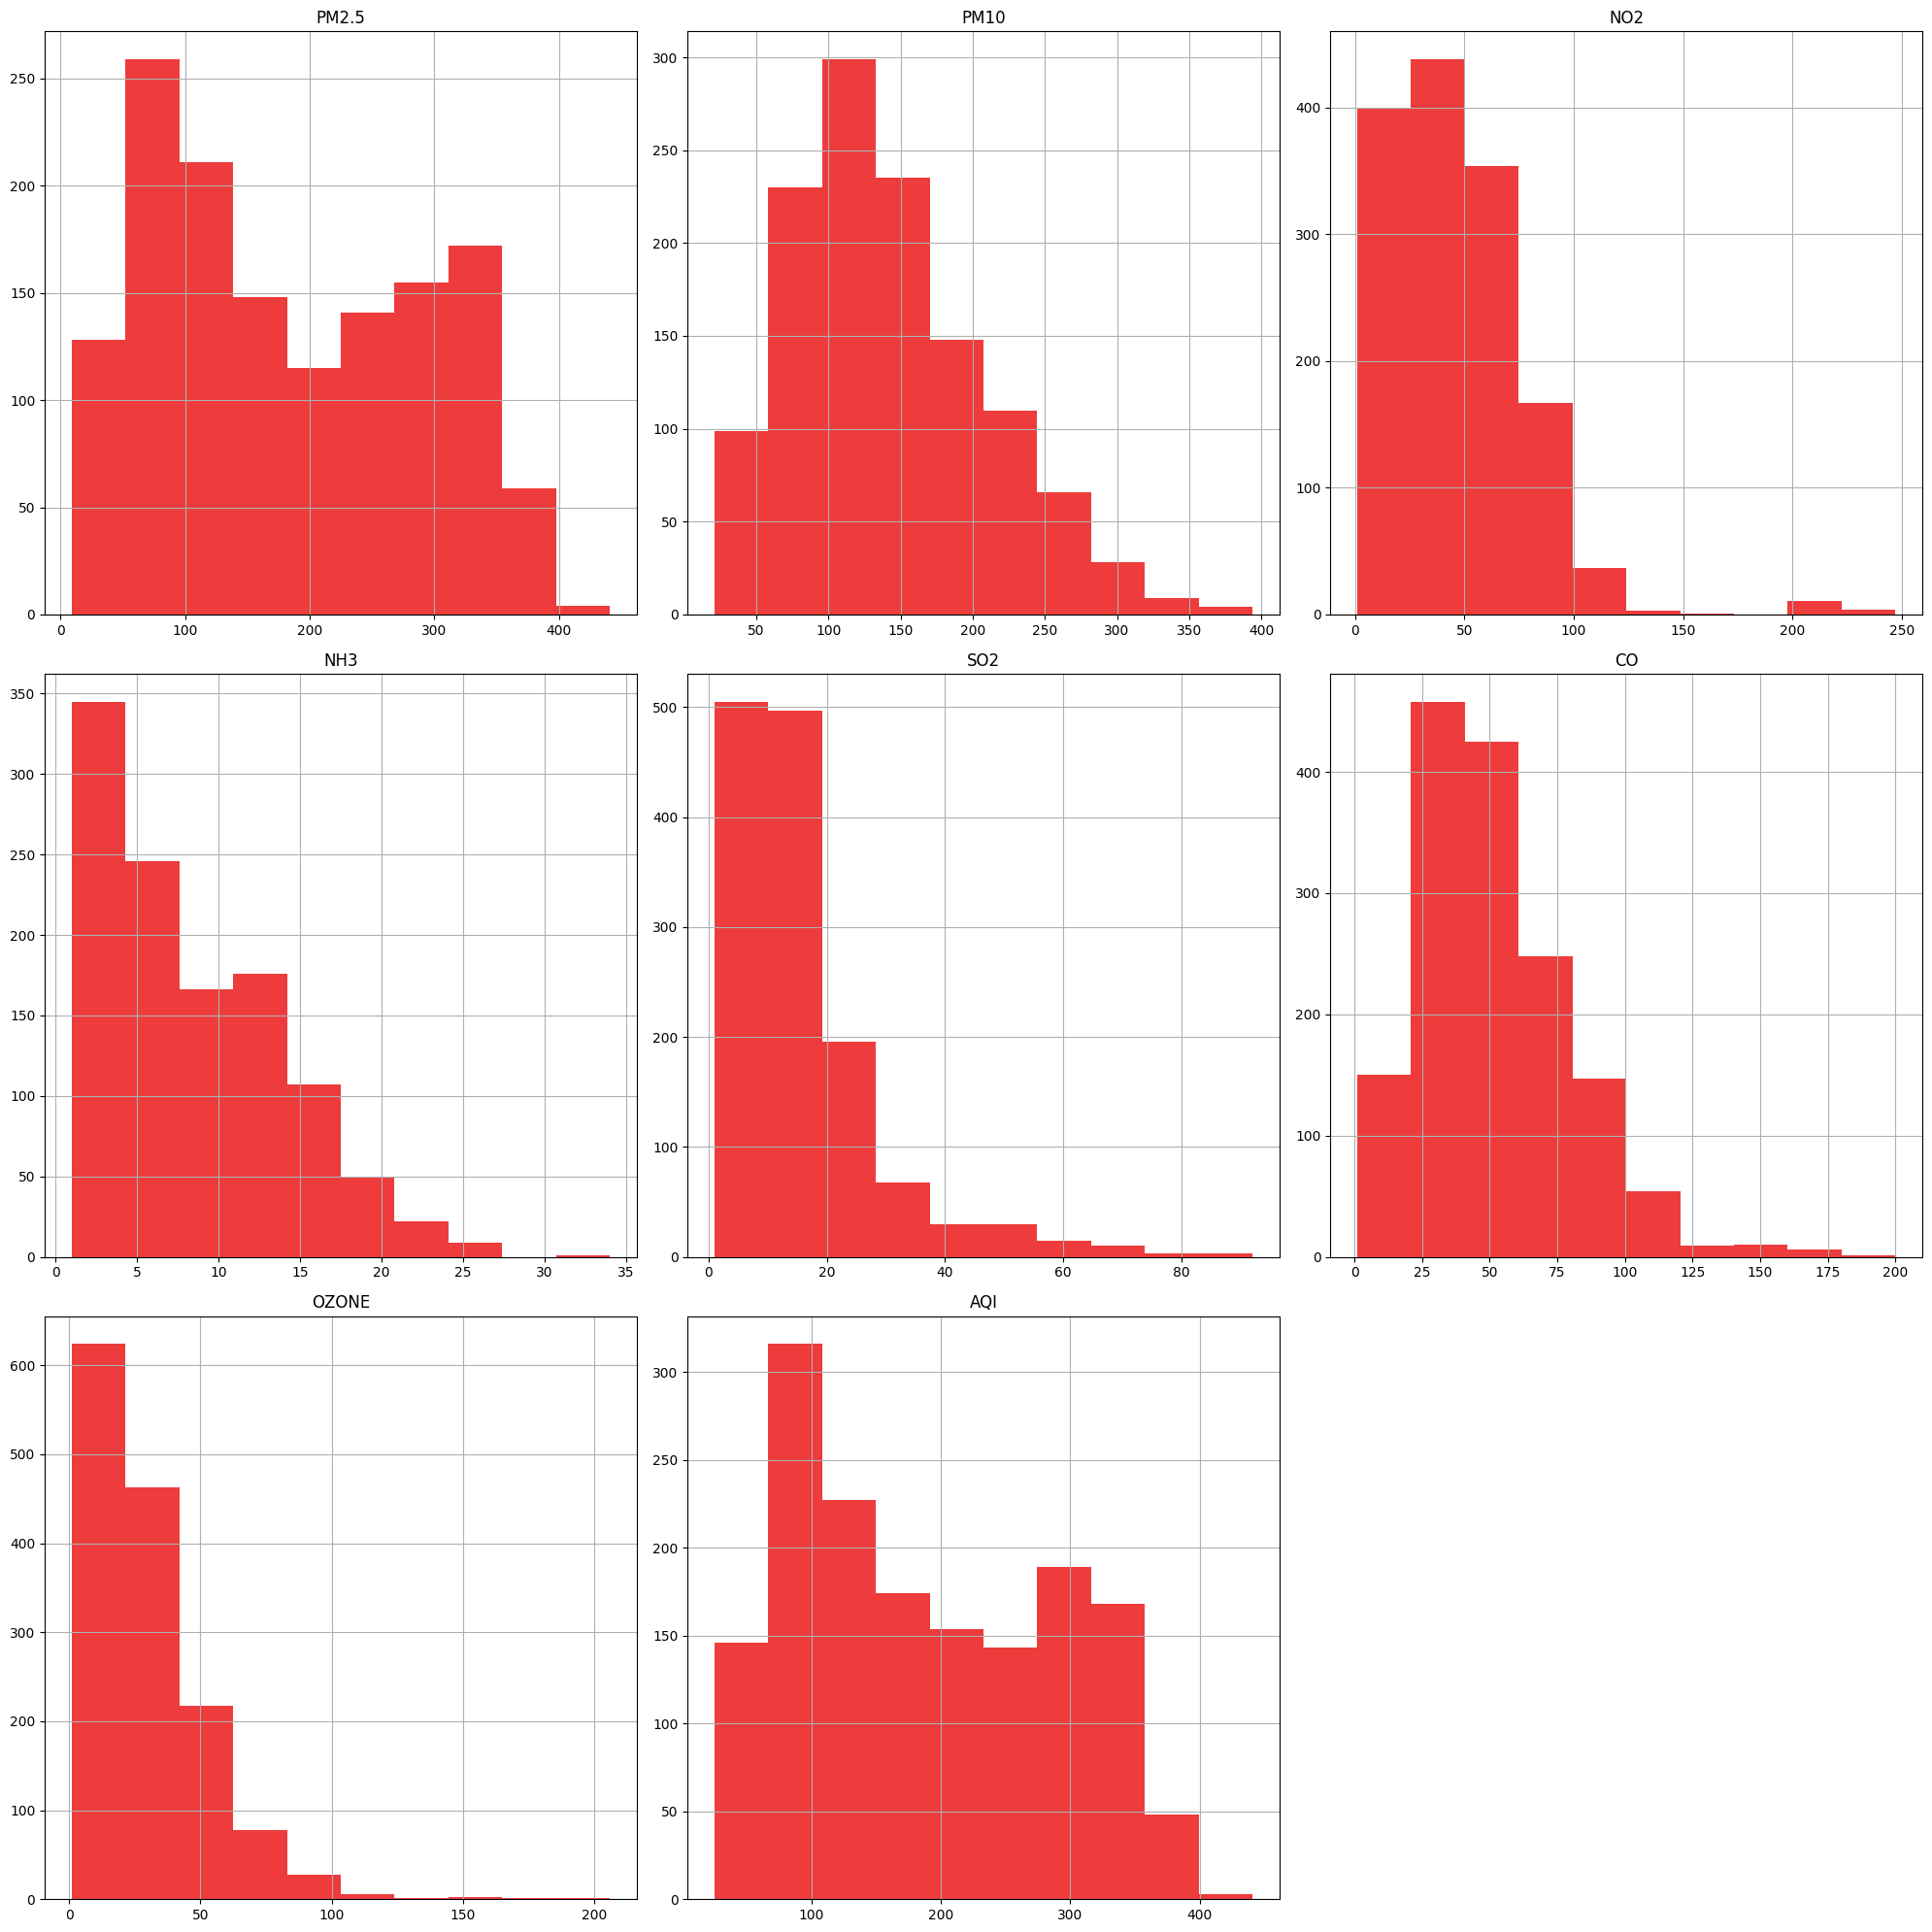

In [66]:
import matplotlib.pyplot as plt
df.hist(figsize = (20,20),color='#EE3B3B')
plt.tight_layout()
plt.show()

In [67]:
df['Predominant_Parameter'].value_counts()

PM2.5    998
PM10     320
CO        78
OZONE     26
NO2        6
Name: Predominant_Parameter, dtype: int64

In [68]:
import plotly.express as px
Predominant_Parameter = ['PM2.5','PM10','CO','OZONE','NO2']
val_counts = [998,320,78,26,6]

fig = px.pie(values=val_counts,names=Predominant_Parameter,
             color=Predominant_Parameter,
             color_discrete_map={'PM2.5':'#FF6103',
                                 'PM10':'#7FFF00','CO':'#FFD700','OZONE':'#191970','NO2':'aqua'},
             title='Predominant_Parameter Count')

fig.show()

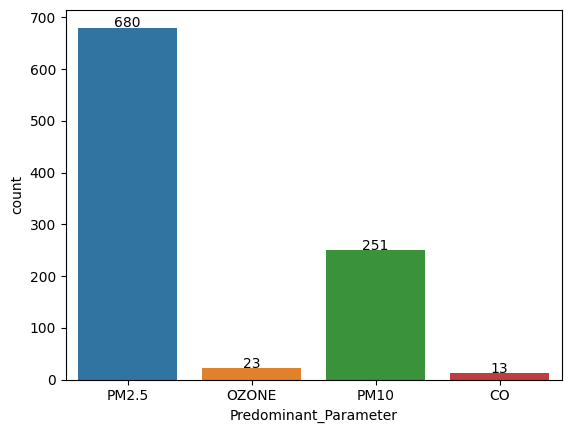

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x="Predominant_Parameter", data=df_cleaned)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+0.3,'{:.0f}'.format(height), ha="center")

<Figure size 2000x2000 with 0 Axes>

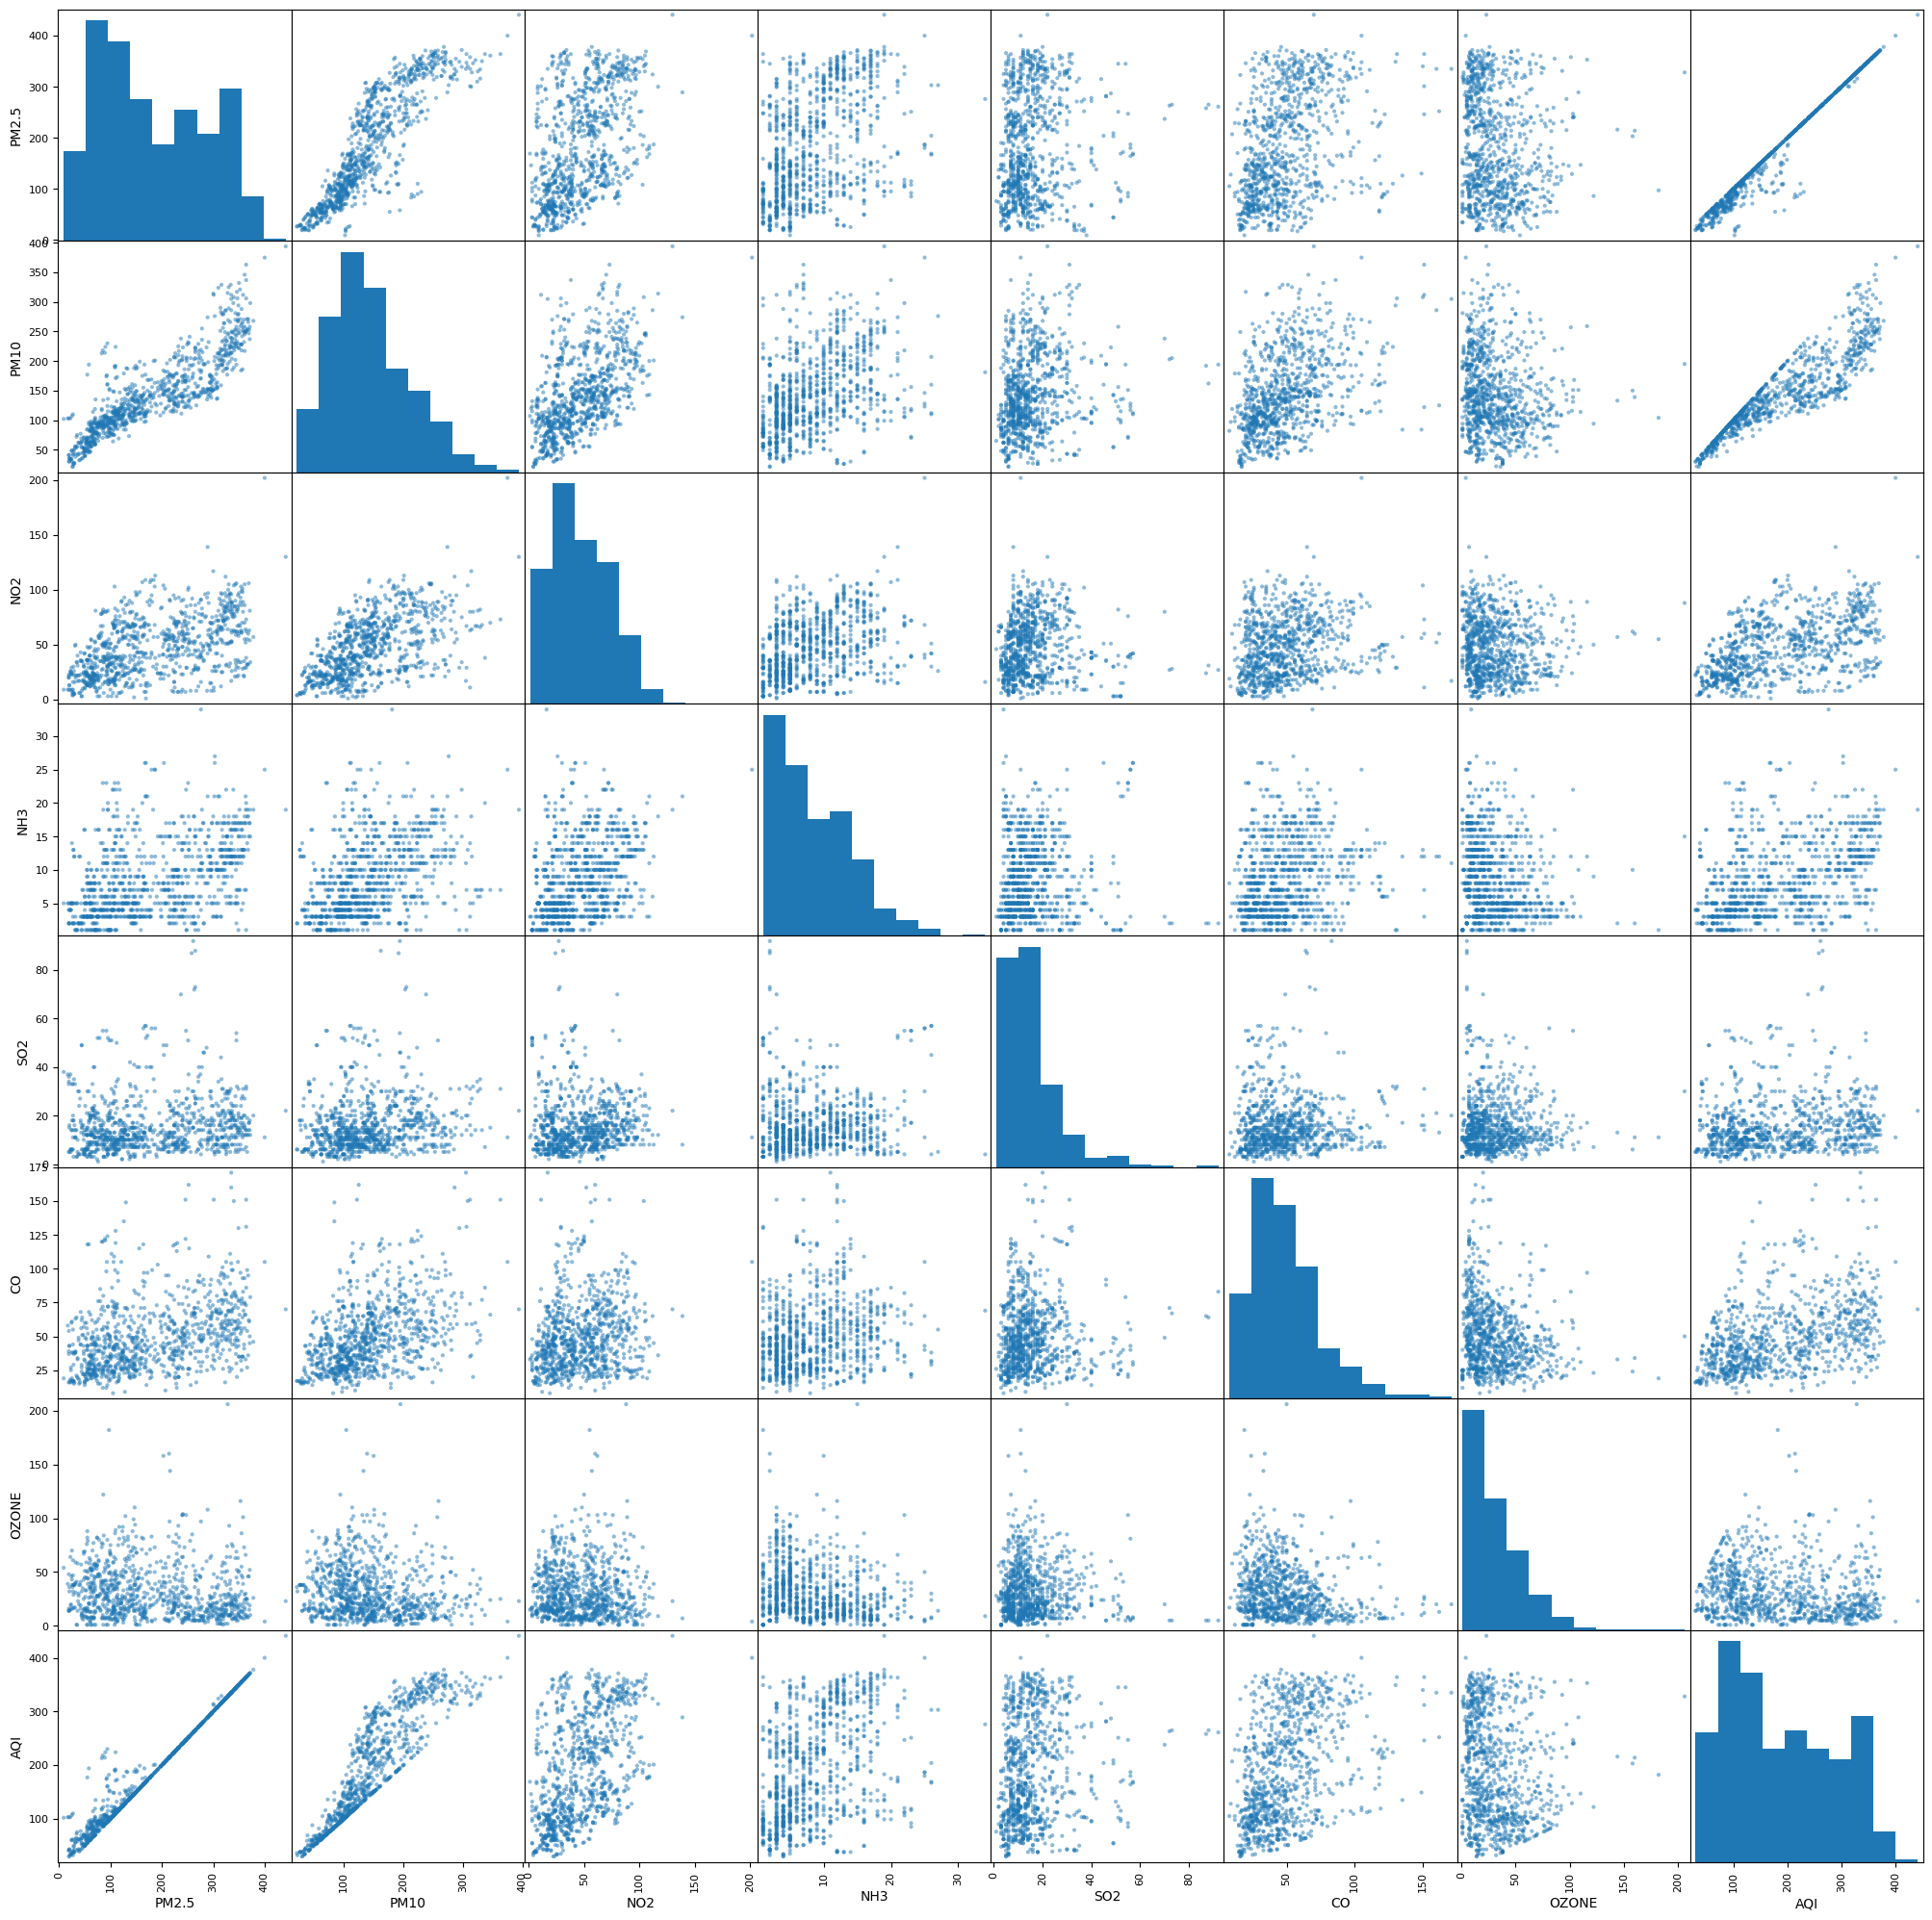

In [70]:
plt.figure(figsize=(20,20))
from pandas.plotting import scatter_matrix
p=scatter_matrix(df_cleaned,figsize=(25, 25))

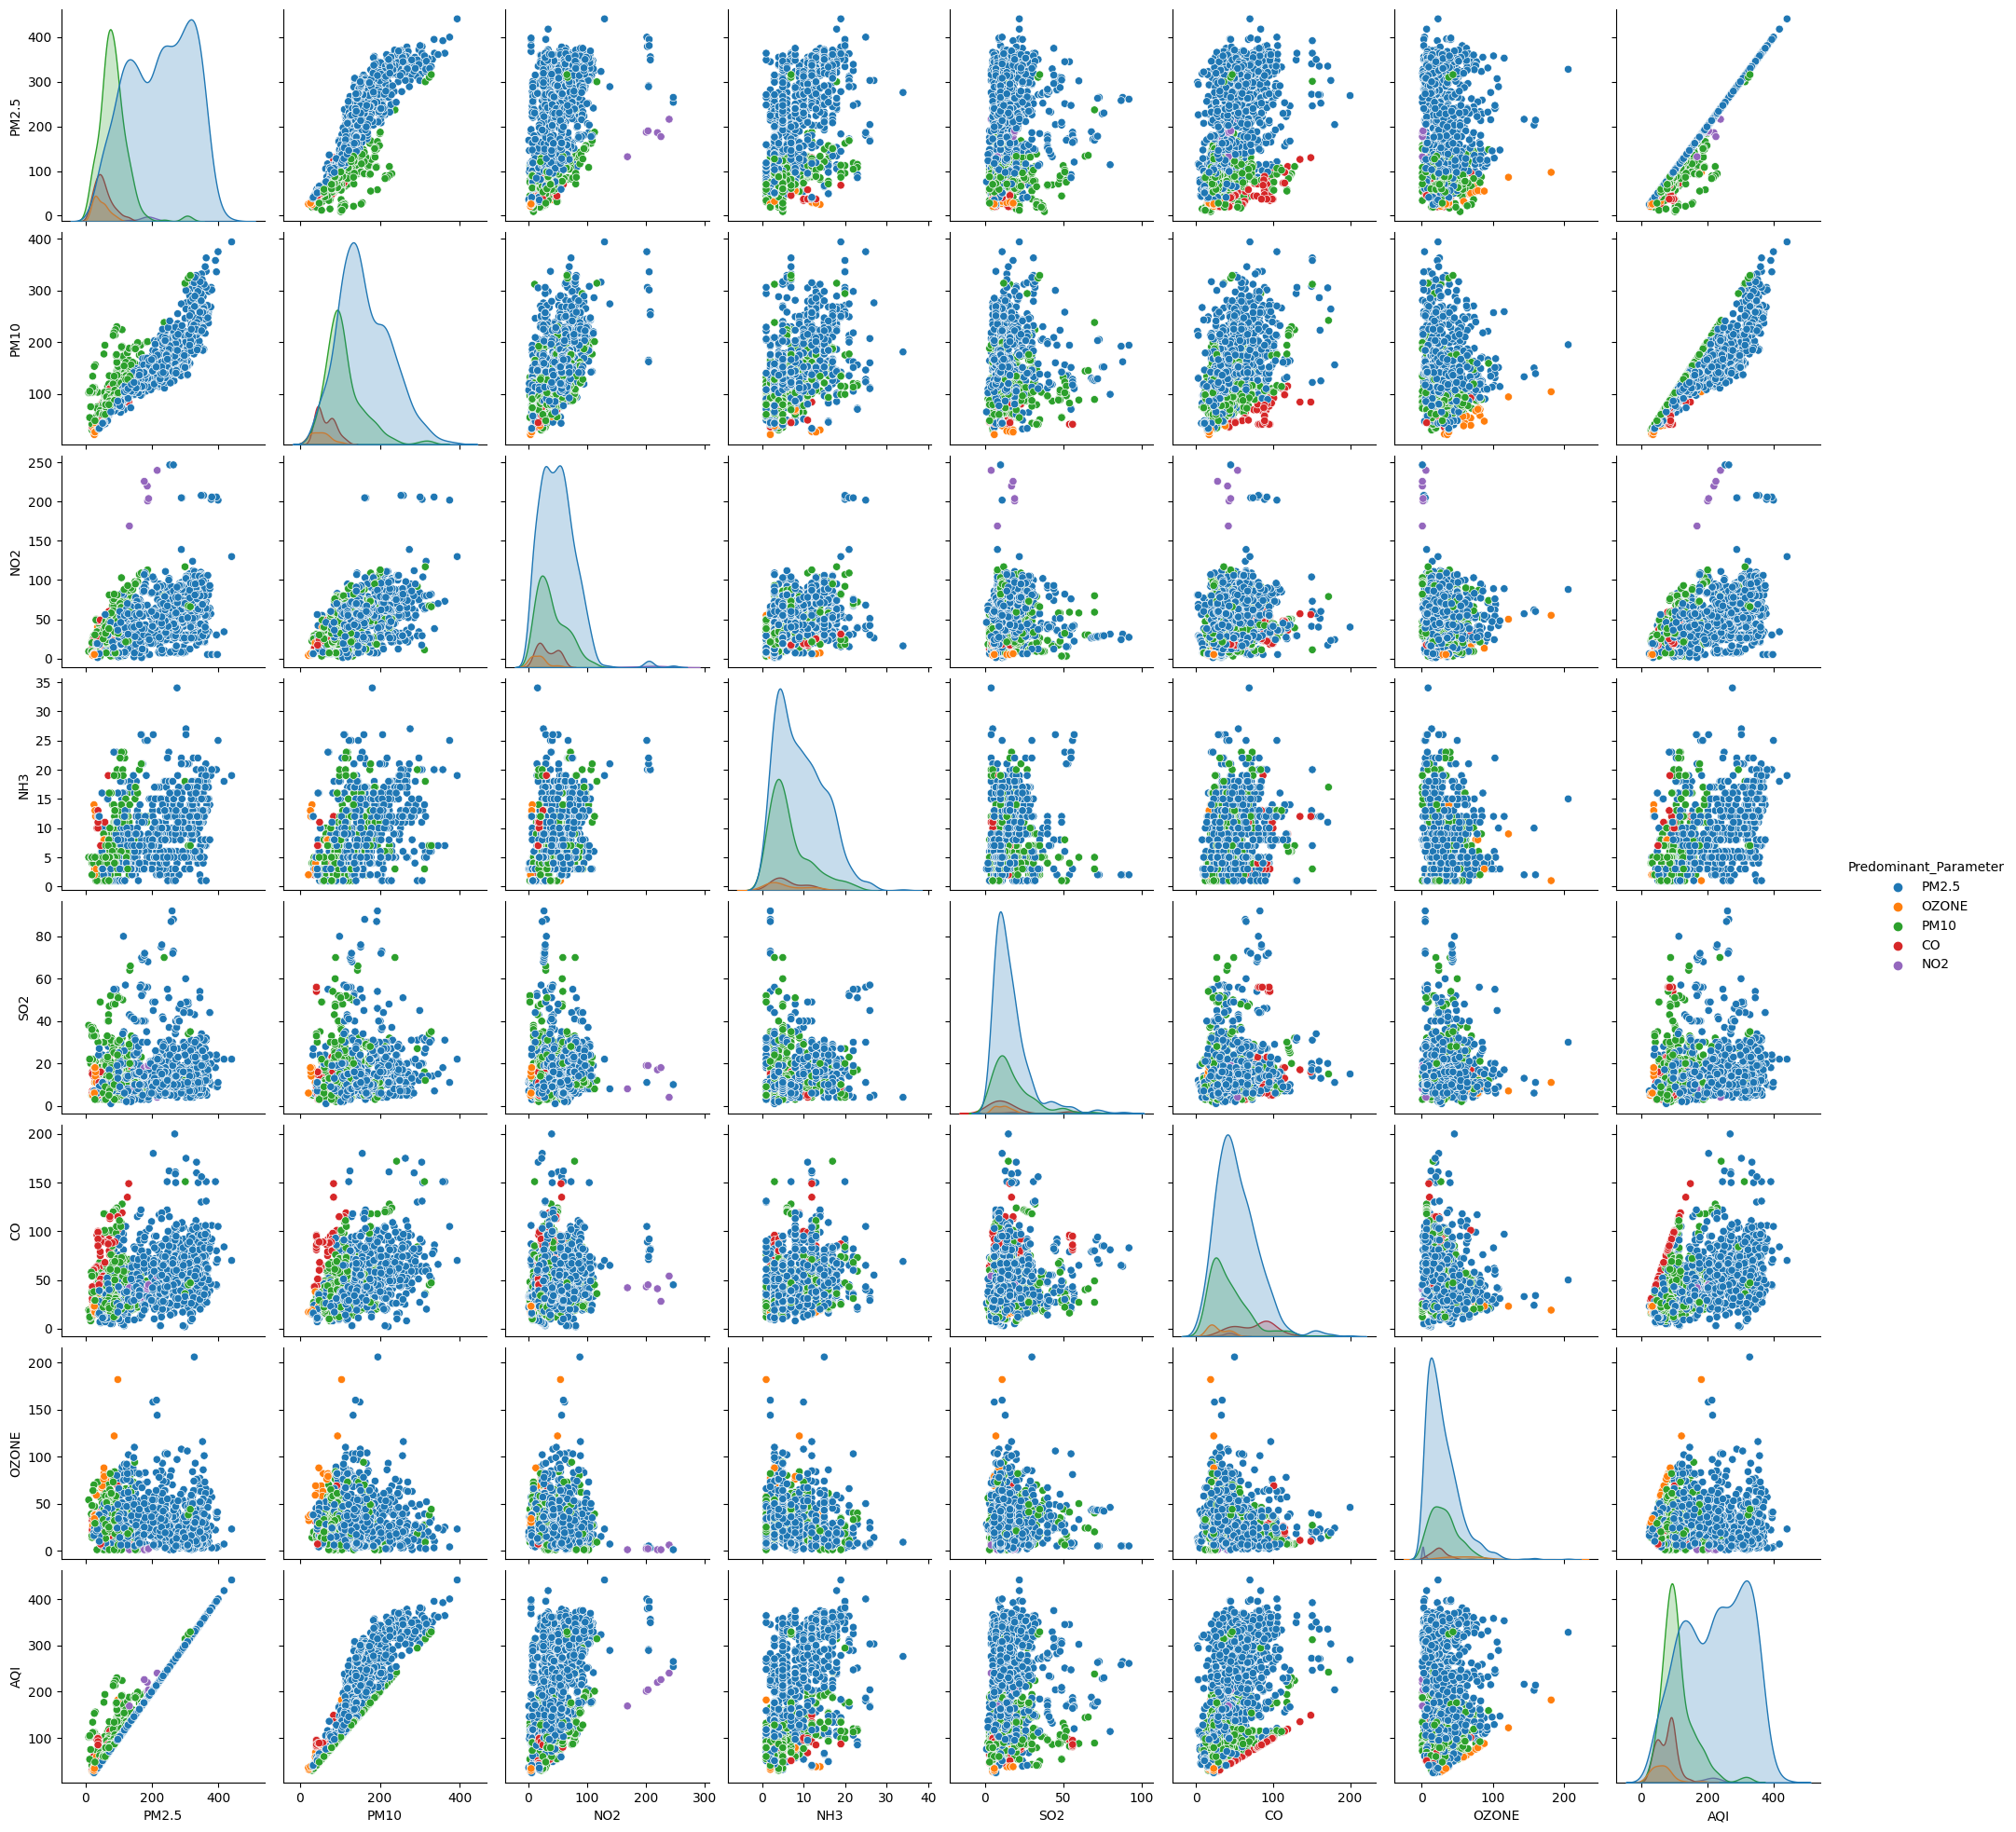

In [71]:
p=sns.pairplot(df, hue = 'Predominant_Parameter')

#MODEL DEPLOYMENT